<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/3DV/labs/cv10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10th Lab - Monocular 3D Object Detection

In this lab we will use MMPose for 3D monocular object detection. We will install it first.

In [ ]:
!pip3 install openmim
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1
!mim install mmengine
!mim install "mmcv>=2.0.0rc4,<2.1.0"
!mim install "mmdet>=3.0.0,<3.1.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection3d.git -b dev-1.x
%cd mmdetection3d
!pip install -e .

fatal: destination path 'mmdetection3d' already exists and is not an empty directory.
/content/mmdetection3d
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection3d
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet3d
    Found existing installation: mmdet3d 1.1.0
    Uninstalling mmdet3d-1.1.0:
      Successfully uninstalled mmdet3d-1.1.0
  Running setup.py develop for mmdet3d


In [ ]:
%cd mmdetection3d/

/content/mmdetection3d/mmdetection3d


## Data
Next we download the model trained on the NuScenes dataset and also images to use for the demo.

In [ ]:
!mim download mmdet3d --config fcos3d_r101-caffe-dcn_fpn_head-gn_8xb2-1x_nus-mono3d_finetune --dest .

processing fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d...
fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_20210715_235813-4bed5239.pth exists in /content/mmdetection3d/mmdetection3d
Successfully dumped fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d.py to /content/mmdetection3d/mmdetection3d


{'metainfo': {'DATASET': 'KITTI'}, 'data_list': [{'sample_id': 8, 'images': {'CAM0': {'cam2img': [[721.5377, 0.0, 609.5593, 0.0], [0.0, 721.5377, 172.854, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'lidar2img': [[609.6954175209152, -721.4215943316945, -1.2512579994207245, -167.89907838168253], [180.38420408453626, 7.644797969406144, -719.6515015339527, -101.2330630658172], [0.9999454021453857, 0.00012436544056981802, 0.010451302863657475, -0.2721327841281891], [0.0, 0.0, 0.0, 1.0]]}, 'CAM1': {'cam2img': [[721.5377, 0.0, 609.5593, -387.5744], [0.0, 721.5377, 172.854, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'lidar2img': [[609.6954175209152, -721.4215943316945, -1.2512579994207245, -555.4734783816825], [180.38420408453626, 7.644797969406144, -719.6515015339527, -101.2330630658172], [0.9999454021453857, 0.00012436544056981802, 0.010451302863657475, -0.2721327841281891], [0.0, 0.0, 0.0, 1.0]]}, 'CAM2': {'img_path': '000008.png', 'height': 375, 'width': 1242, 'cam2img': [[

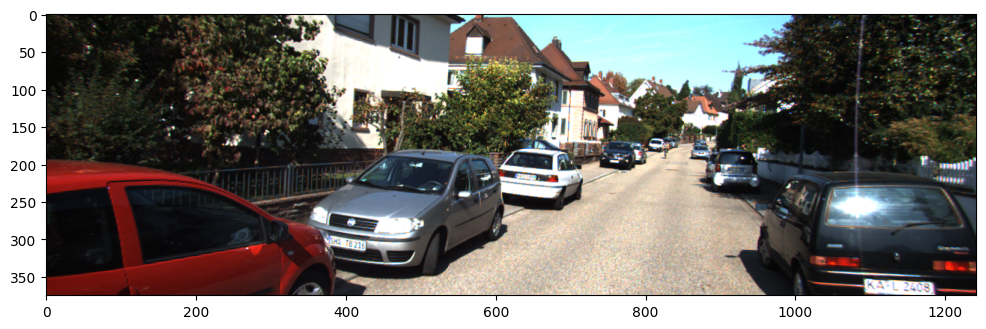

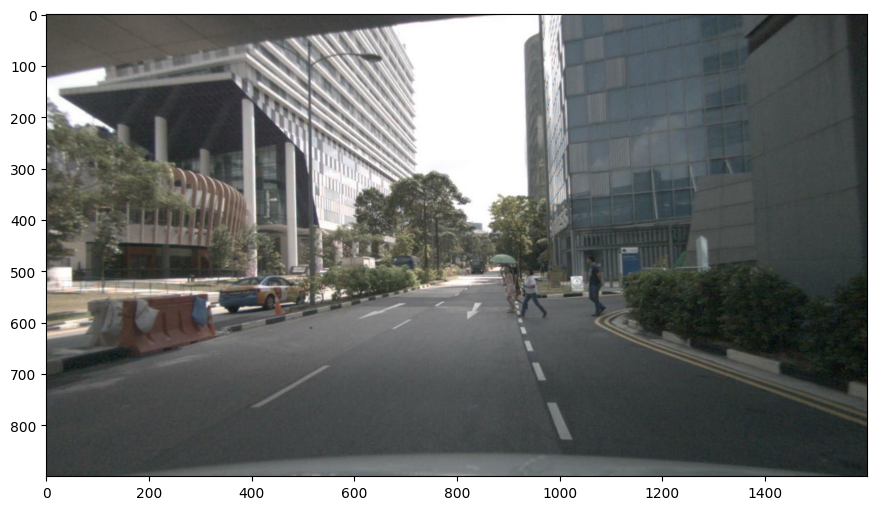

In [ ]:
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt

with open('demo/data/kitti/000008.pkl', 'rb') as f:
  kitti_metadata = pickle.load(f)
print(kitti_metadata)

kitti_img = cv2.imread('demo/data/kitti/000008.png')

plt.figure(figsize = [12, 6])
plt.imshow(kitti_img[:, :, ::-1])


with open('demo/data/nuscenes/n015-2018-07-24-11-22-45+0800.pkl', 'rb') as f:
  ns_metadata = pickle.load(f)
print(ns_metadata)
ns_img = cv2.imread('demo/data/nuscenes/n015-2018-07-24-11-22-45+0800__CAM_BACK__1532402927637525.jpg')
plt.figure(figsize = [12, 6])
plt.imshow(ns_img[:, :, ::-1])

## Inference

We can now run the inference. Note that the inference script requires us to specify which camera we use from the dataset (as the original dataset contains multiple views)

In [ ]:
from mmdet3d.apis import init_model, inference_mono_3d_detector

config_file = 'fcos3d_r101-caffe-dcn_fpn_head-gn_8xb2-1x_nus-mono3d_finetune.py'
checkpoint_file = 'fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_finetune_20210717_095645-8d806dc2.pth'
model = init_model(config_file, checkpoint_file)

kitti_result = inference_mono_3d_detector(model, 'demo/data/kitti/000008.png', 'demo/data/kitti/000008.pkl', 'CAM2')
ns_result = inference_mono_3d_detector(model, 'demo/data/nuscenes/n015-2018-07-24-11-22-45+0800__CAM_BACK__1532402927637525.jpg', 'demo/data/nuscenes/n015-2018-07-24-11-22-45+0800.pkl', 'CAM_BACK')

print(kitti_result)
print(ns_result)

Loads checkpoint by local backend from path: fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_20210715_235813-4bed5239.pth


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<Det3DDataSample(

    META INFORMATION
    box_type_3d: <class 'mmdet3d.structures.bbox_3d.cam_box3d.CameraInstance3DBoxes'>
    scale_factor: (1.0, 1.0)
    img_shape: (375, 1242)
    cam2img: [[721.5377, 0.0, 609.5593, 44.85728], [0.0, 721.5377, 172.854, 0.2163791], [0.0, 0.0, 1.0, 0.002745884], [0.0, 0.0, 0.0, 1.0]]
    ori_shape: (375, 1242)
    pad_shape: (384, 1248)
    box_mode_3d: <Box3DMode.CAM: 1>
    lidar2cam: [[0.00023477380455005914, -0.9999441504478455, -0.01056347694247961, -0.0027968171052634716], [0.010449407622218132, 0.01056535355746746, -0.999889612197876, -0.07510878890752792], [0.9999454021453857, 0.00012436544056981802, 0.010451302863657475, -0.2721327841281891], [0.0, 0.0, 0.0, 1.0]]
    img_path: 'demo/data/kitti/000008.png'
    batch_input_shape: (384, 1248)
    lidar2img: [[609.6954175209152, -721.4215943316945, -1.2512579994207245, -123.04179838168253], [180.38420408453626, 7.644797969406144, -719.6515015339527, -101.01668396581721], [0.9999454021453857, 0

## Exercise - Showing the output 3D bboxes

Given the results your task is now to plot the detected 3D boxes (above some threshold - e.g. 0.3). You can plot only the 8 corners (3 pts) or also include the edges (4 pts). You need to do this for only one of the images (KITTI or NuScenes).

Implement this by drawing the detections yourself using Matplotlib and/or OpenCV libraries. You will need to project the positions of the 3D corners to the image via the projection matrix $P$. MMPose calls this matrix `cam2img` in their structure. Note however that they sometimes mean $K$ when using this, but in that case you can assume that $R = I$ and $\vec{t} = \vec{0}$.

*Note*: In the following text I provide links to the github page at a commit where the demo and instructions were the same as when I created this exercise. The information provided in the current version may differ.

You will need to use the structure of the result to obtain the positions of the corners in 3D. It may be useful to consult the [MMDetection3D Github Page](https://github.com/open-mmlab/mmdetection3d/blob/7d5c5a33d7f2261ea0a988ca52749125ecc97db4/README.md). More specifically you can start your search by looking at how they use the data in their [demo](https://github.com/open-mmlab/mmdetection3d/blob/7d5c5a33d7f2261ea0a988ca52749125ecc97db4/demo/mono_det_demo.py) (which does not work in Colab - sadly). Alternatively you could find out the structure yourself by printing `.__dir__()` on any objects you want to probe for values, properties and methods.

If you get a torch.Tensor object. You can obtain its numpy version by simply applying `.detach().cpu().numpy()` to it.

To draw the box you can connect the corners in the order defined by `verts_idx = [0, 1, 2, 3, 7, 6, 5, 4, 0, 3, 7, 4, 5, 1, 2, 6]`.

In [ ]:
...

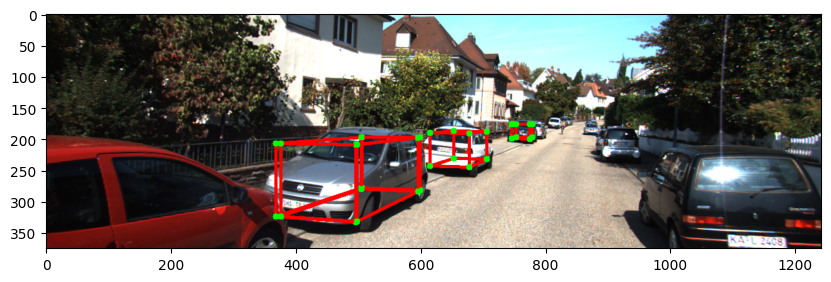

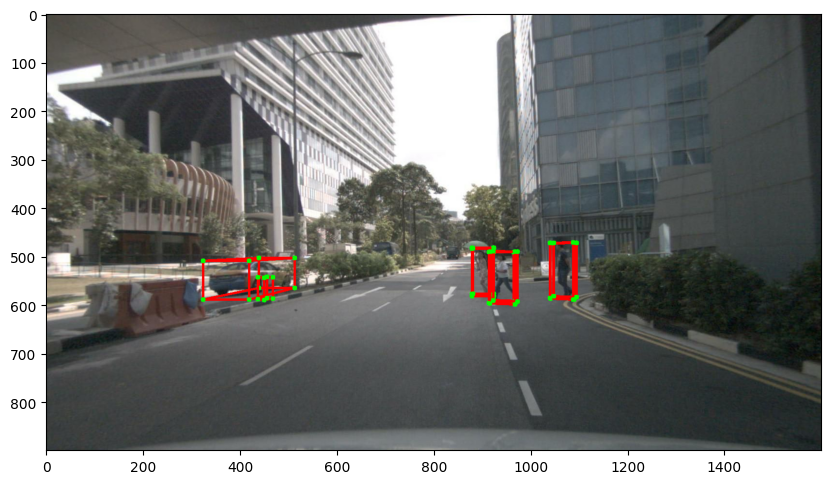

In [ ]:
...

## Exercise - Running on a custom image.

In the previous exercise you ran the network on a prepared images. In this exercise your task is to try running on a different kitti image. You can assume that the matrix $P$ is the same as for the first example. You can do this a "hacky way" that requires creating a new .pkl data file or dircetly by checking how the data is fed into the actual torch model in [the demo](https://github.com/open-mmlab/mmdetection3d/blob/main/demo/mono_det_demo.py) (you have to follow the calls).

The hacky approach is for 2pts and the proper approach is for unspecified amount of pts.

You can use the image downloaded below.

/content/mmdetection3d
--2023-05-08 17:19:22--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/kitti.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 850808 (831K) [image/png]
Saving to: ‘kitti.png’

kitti.png           100%[===================>] 830.87K  --.-KB/s    in 0.04s   

2023-05-08 17:19:22 (18.1 MB/s) - ‘kitti.png’ saved [850808/850808]



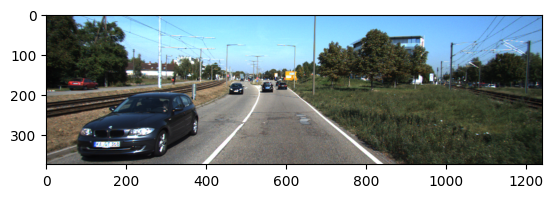

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/kitti.png
img = cv2.imread('kitti.png')

plt.imshow(img[:, :, ::-1])
plt.show()

In [ ]:
...

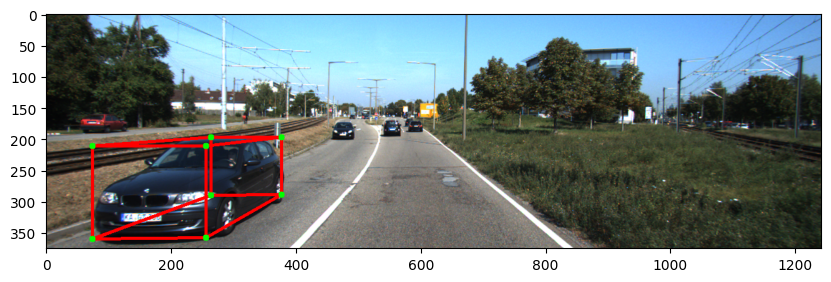

In [ ]:
...